In [1]:
from sympy import *
init_printing()

## Symbols

In [2]:
x, mu, sigma = symbols('x mu sigma')

In [3]:
mu + sigma

In [4]:
mu * sigma

In [5]:
bell = exp(-(x - mu)**2 / sigma**2)
bell

## Numerical Evaluation

In [6]:
bell.subs(x, 0)

In [7]:
pi.evalf(n=200)

## Differentiation

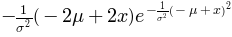

In [8]:
bell.diff(x)

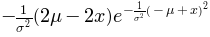

In [9]:
bell.diff(mu)

## Integration

In [10]:
integrate(x**2, x)

In [11]:
integrate(x**2, (x, 0, 3))

## Series Expansion

In [12]:
trig = sin(x)

In [13]:
series(trig, x, 0, 10)

In [14]:
f = fps(trig, x)

In [15]:
f.infinite

       ∞                                                             
    ________                                                         
    ╲                                                                
     ╲       ⎧                k   1                                  
      ╲      ⎪                ─ - ─                                  
       ╲     ⎪                2   2  k                               
        ╲    ⎪            -1/4     ⋅x                                
         ╲   ⎪────────────────────────────────────  for Mod(k, 2) = 1
          ╲  ⎨               ⎛     k   1⎞ ⎛k   1⎞                    
x +       ╱  ⎪RisingFactorial⎜3/2, ─ - ─⎟⋅⎜─ - ─⎟!                   
         ╱   ⎪               ⎝     2   2⎠ ⎝2   2⎠                    
        ╱    ⎪                                                       
       ╱     ⎪                 0                        otherwise    
      ╱      ⎩                                                       
     ╱              

In [16]:
f.truncate(10)

## Solveset

In [17]:
solveset(x**2 - 4, x) 

In [18]:
solveset(sin(x) - 1, x) # infinite solutions

In [19]:
solveset(exp(x) - 1, x) # domain

In [20]:
solveset(exp(x) - 1, x, domain=S.Reals) # domain

In [21]:
solveset(exp(x) + cos(x) + 1, x, domain=S.Reals) # condition set

## Matrices

In [22]:
r, theta = symbols('r theta')

In [23]:
rot = Matrix([[r*cos(theta), -r*sin(theta)],
              [r*sin(theta),  r*cos(theta)]])
rot

⎡r⋅cos(θ)  -r⋅sin(θ)⎤
⎢                   ⎥
⎣r⋅sin(θ)  r⋅cos(θ) ⎦

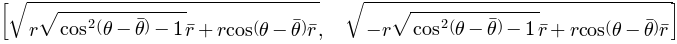

In [24]:
rot.singular_values()

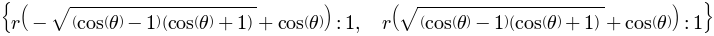

In [25]:
rot.eigenvals()

## Code Generation

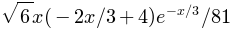

In [26]:
from sympy.physics.hydrogen import R_nl
expr = R_nl(3, 1, x, 1)
expr

In [27]:
from sympy.utilities.lambdify import lambdify
fn_numpy = lambdify(x, expr, 'numpy')

In [28]:
from numpy import linspace
xx = linspace(0, 1, 5)
fn_numpy(xx)

array([ 0.        ,  0.02666343,  0.0469299 ,  0.06182246,  0.07222782])

## Plot from Matplotlib

In [29]:
from matplotlib.pyplot import plot, show, legend
%matplotlib inline

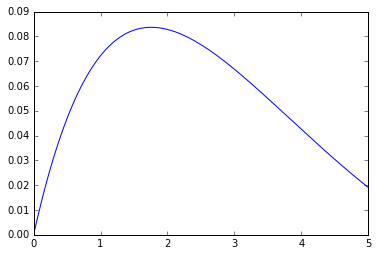

In [30]:
xx = linspace(0, 5, 50000)  # More points 
plot(xx, fn_numpy(xx))

## Generating Code

In [31]:
from sympy.utilities.codegen import codegen
codegen(('expr', expr), 'C')

[('expr.c',
  '/******************************************************************************\n *                       Code generated with sympy 1.0                        *\n *                                                                            *\n *              See http://www.sympy.org/ for more information.               *\n *                                                                            *\n *                       This file is part of \'project\'                       *\n ******************************************************************************/\n#include "expr.h"\n#include <math.h>\n\ndouble expr(double x) {\n\n   double expr_result;\n   expr_result = (1.0L/81.0L)*sqrt(6)*x*(-2.0L/3.0L*x + 4)*exp(-1.0L/3.0L*x);\n   return expr_result;\n\n}\n'),
 ('expr.h',
  "/******************************************************************************\n *                       Code generated with sympy 1.0                        *\n *                                 

## Low Dependencies

In [32]:
textplot(x**2, -3, 3)

      9 |                                                        
        |  .                                                    /
        |   \                                                  / 
        |    \                                                /  
        |     \                                              /   
        |      \                                            .    
        |       \                                                
        |        \                                        ..     
4.50149 | --------\--------------------------------------/-------
        |          \                                    /        
        |           \                                  /         
        |            \                                /          
        |             ..                            ..           
        |               \                          /             
        |                ..                      ..              
        | 